In [10]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [11]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


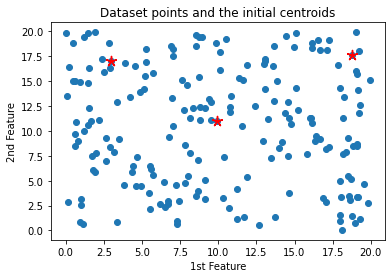

In [13]:
sample_n=200
features_n=2
iteration=100
cluster_n=3
points=np.random.uniform(0,20,(sample_n, features_n))
samples=tf.constant(points)
initial_centroids=tf.slice(tf.random_shuffle(samples),[0,0],[cluster_n,-1])
initial_centroids[0]

x=samples[0]##This shows how we can access the first point in the dataset
S=x[1]

##Plotting the points and the centroids
X=points[:,0]
Y=points[:,1]
plt.scatter(X,Y)
##Now plot the initial centroids
sess = tf.Session(); 
with sess.as_default(): 
  cent=initial_centroids.eval()
  X1=cent[:,0]
  Y1=cent[:,1]
  plt.scatter(X1,Y1, s=100, color='red',marker=(5, 2))
  plt.xlabel('1st Feature')
  plt.ylabel('2nd Feature')
  plt.title('Dataset points and the initial centroids')
  plt.show()

In [14]:
print('The sample shape is like:',samples.shape)
print('The shape of the centroids is like:',initial_centroids.shape)
samples_exp=tf.expand_dims(samples,0)
centroids_exp=tf.expand_dims(initial_centroids,1)
print('The expanded sample shape is like:',samples_exp.shape)
print('The expanded shape of the centroids is like:',centroids_exp.shape)


The sample shape is like: (200, 2)
The shape of the centroids is like: (3, 2)
The expanded sample shape is like: (1, 200, 2)
The expanded shape of the centroids is like: (3, 1, 2)


In [15]:
samples_exp.dtype
subb=tf.subtract(centroids_exp,samples_exp)
print(subb.shape)
sq=tf.square(subb)
print(sq.shape) ##3,200,2
distance=tf.reduce_sum(sq,2)
print(distance.shape)
IND1=tf.argmin(distance,0)
print(IND1.shape)

(3, 200, 2)
(3, 200, 2)
(3, 200)
(200,)


In [16]:
def update_centroids(samples, IND, cluster_n):
    # Updates the centroid to be the mean of all samples associated with it.
    IND2=tf.cast(IND,'int32')
    partitions = tf.dynamic_partition(samples, IND2,cluster_n)#this partitions the data according to the dimensions in IND1
    new_centroids = tf.concat([tf.expand_dims(tf.reduce_mean(partition, 0), 0) for partition in partitions], 0)
    return new_centroids

iteration=1
while(True): 
  
  if iteration==1:
    centroids_exp=tf.expand_dims(initial_centroids,1)
  else:
    centroids_exp=tf.expand_dims(Centroids,1)
    
  subb=tf.subtract(centroids_exp,samples_exp)
  sq=tf.square(subb)
  distance=tf.reduce_sum(sq,2)
  IND1=tf.argmin(distance,0)
  updated_centroids=update_centroids(samples,IND1,cluster_n)
  model = tf.global_variables_initializer()
  with tf.Session() as session:
        sample_values = session.run(samples)
        updated_centroid_value = session.run(updated_centroids)
        print(updated_centroid_value)
      
  Centroid_prev=tf.squeeze(centroids_exp) 
  diff0=tf.subtract(Centroid_prev[0], updated_centroid_value[0])  
  Diff0=tf.norm(diff0,ord='euclidean')
  
  diff1=tf.subtract(Centroid_prev[1], updated_centroid_value[1])  
  Diff1=tf.norm(diff1,ord='euclidean')
  
  diff2=tf.subtract(Centroid_prev[2], updated_centroid_value[2])  
  Diff2=tf.norm(diff2,ord='euclidean')
  
  with sess.as_default():
    
    Diff0=Diff0.eval()
    Diff1=Diff1.eval()
    Diff2=Diff2.eval()
  
    Diff=Diff0+Diff1+Diff2
    print(Diff)
    if Diff<10**(-1):
        Index=IND1;
        break;
    else:
        Centroids=updated_centroid_value
        iteration=iteration+1
print('The Total number of iterations is:',iteration)
 

[[14.49724686 10.19097226]
 [ 4.05719687 16.73423154]
 [ 3.91363383  6.13181471]]
28.119129474897
[[15.45739451 10.65273049]
 [ 4.81668304 16.49716722]
 [ 4.98585613  5.52362962]]
3.0937376242396493
[[15.95556744 10.77508549]
 [ 5.10849986 15.89700665]
 [ 5.41712143  5.26154145]]
1.6849821480383298
[[16.21803891 10.82333215]
 [ 5.26143591 15.63563167]
 [ 5.81492448  5.01130499]]
1.0396627640166236
[[16.36555483 10.78661437]
 [ 5.45491403 15.44040509]
 [ 5.79357452  4.91605546]]
0.5244884013990156
[[16.50543536 10.7297927 ]
 [ 5.62637917 15.3636011 ]
 [ 5.79357452  4.91605546]]
0.33886168989538706
[[16.57796301 10.7089626 ]
 [ 5.70811523 15.31616886]
 [ 5.79357452  4.91605546]]
0.16996146780053617
[[16.57796301 10.7089626 ]
 [ 5.70811523 15.31616886]
 [ 5.79357452  4.91605546]]
0.0
The Total number of iterations is: 8
